# Tempo Analysis

This notebook analyzes tempos from the preprocessed dataset and calculates new tempos from the audio files.

In [1]:
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os

# Set plot style
plt.style.use('seaborn')
sns.set_palette('husl')

/var/folders/17/b1txq3n15cb37zv_2hv6vwjr0000gn/T/ipykernel_83299/204163191.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Load and Prepare Data

In [5]:
# Load the dataframe
df = pd.read_pickle('/Users/abelboros/Documents/Personal/Thesis/PopMusicInformationRetrieval/Data/pkl_data/preprocessed_df.pkl')

# Create new file paths
base_path = '/Users/abelboros/Documents/Personal/Thesis/PopMusicInformationRetrieval/Data/music'
df['file_path'] = df['Path'].apply(lambda x: os.path.join(base_path, os.path.basename(x).replace('.mp3', '.wav')))

print(f"Dataframe shape: {df.shape}")
df.head()

Dataframe shape: (1368, 14)


,Artist,Album,Song,Coast,Release Year,Tempo1,Tempo2,Duration (s),Sample Rate (Hz),Path,Lyrics,Tokens,Processed_Lyrics,file_path
0,Big L,Lifestylez Ov Da Poor and Dangerous,8 Iz Enuff.mp3,east_coast,1995,96.774194,48.000000,298.840000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,"\n\nYo\nMy crew is in the house\nTerra, Herb M...","[crew, house, bless, big, mike, imma, set, fol...",crew house terra herb mcgruff buddah bless big...,/Users/abelboros/Documents/Personal/Thesis/Pop...
1,Big L,Lifestylez Ov Da Poor and Dangerous,Da Graveyard.mp3,east_coast,1995,93.750000,46.511628,323.760000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,\n\n[Intro:]\nIt's the number one crew in the ...,"[number, one, crew, big, nigga, men, win, kill...",number one crew area big lightin nigga incense...,/Users/abelboros/Documents/Personal/Thesis/Pop...
2,Big L,Lifestylez Ov Da Poor and Dangerous,I Don't Understand It.mp3,east_coast,1995,93.750000,47.244094,260.226667,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,\n\n[Verse 1]\nThere are too many MC's who are...,"[many, mcs, ask, even, supposed, make, rap, kn...",many mcs overrated ask even supposed make rap ...,/Users/abelboros/Documents/Personal/Thesis/Pop...
3,Big L,Lifestylez Ov Da Poor and Dangerous,"No Endz, No Skinz.mp3",east_coast,1995,100.000000,50.420168,208.733333,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,\n\n[Verse 1:]\nLet me get to the point real q...,"[let, point, real, quick, pocket, thick, mad, ...",let get point real quick pocket thick mad chic...,/Users/abelboros/Documents/Personal/Thesis/Pop...
4,Big L,Lifestylez Ov Da Poor and Dangerous,MVP.mp3,east_coast,1995,86.956522,43.478261,218.866667,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,\n\n[Big L]\n A yo spark up the phillies and p...,"[pass, make, quick, money, grip, ass, street, ...",spark phillies pass stout make quick money gri...,/Users/abelboros/Documents/Personal/Thesis/Pop...


## Calculate Tempos

In [6]:
def calculate_tempo(file_path):
    """Calculate tempo for a given audio file using librosa's dynamic programming beat tracker."""
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)
        
        # Calculate onset strength
        onset_env = librosa.onset.onset_strength(y=y, sr=sr)
        
        # Estimate tempo using dynamic programming
        tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)[0]
        
        return tempo
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

# Calculate tempos for all files
print("Calculating tempos...")
df['calculated_tempo'] = df['file_path'].apply(calculate_tempo)

# Print some statistics about the calculated tempos
print("\nCalculated Tempo Statistics:")
print(df['calculated_tempo'].describe())

Calculating tempos...


/var/folders/17/b1txq3n15cb37zv_2hv6vwjr0000gn/T/ipykernel_83299/1812262381.py:11: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)[0]
/var/folders/17/b1txq3n15cb37zv_2hv6vwjr0000gn/T/ipykernel_83299/1812262381.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/Users/abelboros/.pyenv/versions/3.9.21/envs/thesis_env/lib/python3.9/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing /Users/abelboros/Documents/Personal/Thesis/PopMusicInformationRetrieval/Data/music/Pow (Remastered 2009).wav: [Errno 2] No such file or directory: '/Users/abelboros/Documents/Personal/Thesis/PopMusicInformationRetrieval/Data/music/Pow (Remastered 2009).wav'
Error processing /Users/abelboros/Documents/Personal/Thesis/PopMusicInformationRetrieval/Data/music/In 3's (Remastered 2009).wav: [Errno 2] No such file or directory: "/Users/abelboros/Documents/Personal/Thesis/PopMusicInformationRetrieval/Data/music/In 3's (Remastered 2009).wav"
Error processing /Users/abelboros/Documents/Personal/Thesis/PopMusicInformationRetrieval/Data/music/De La Soul - Transmitting Live from Mars (Official Audio).wav: [Errno 2] No such file or directory: '/Users/abelboros/Documents/Personal/Thesis/PopMusicInformationRetrieval/Data/music/De La Soul - Transmitting Live from Mars (Official Audio).wav'

Calculated Tempo Statistics:
count    1365.000000
mean      111.580627
std        25.704115
min 

,Tempo1,calculated_tempo
0,96.774194,95.703125
1,93.750000,92.285156
2,93.750000,93.963068
3,100.000000,99.384014
4,86.956522,86.132812
...,...,...
1363,93.750000,93.963068
1364,92.307692,92.285156
1365,90.909091,92.285156
1366,95.238095,93.963068


## Compare Tempos by Coast

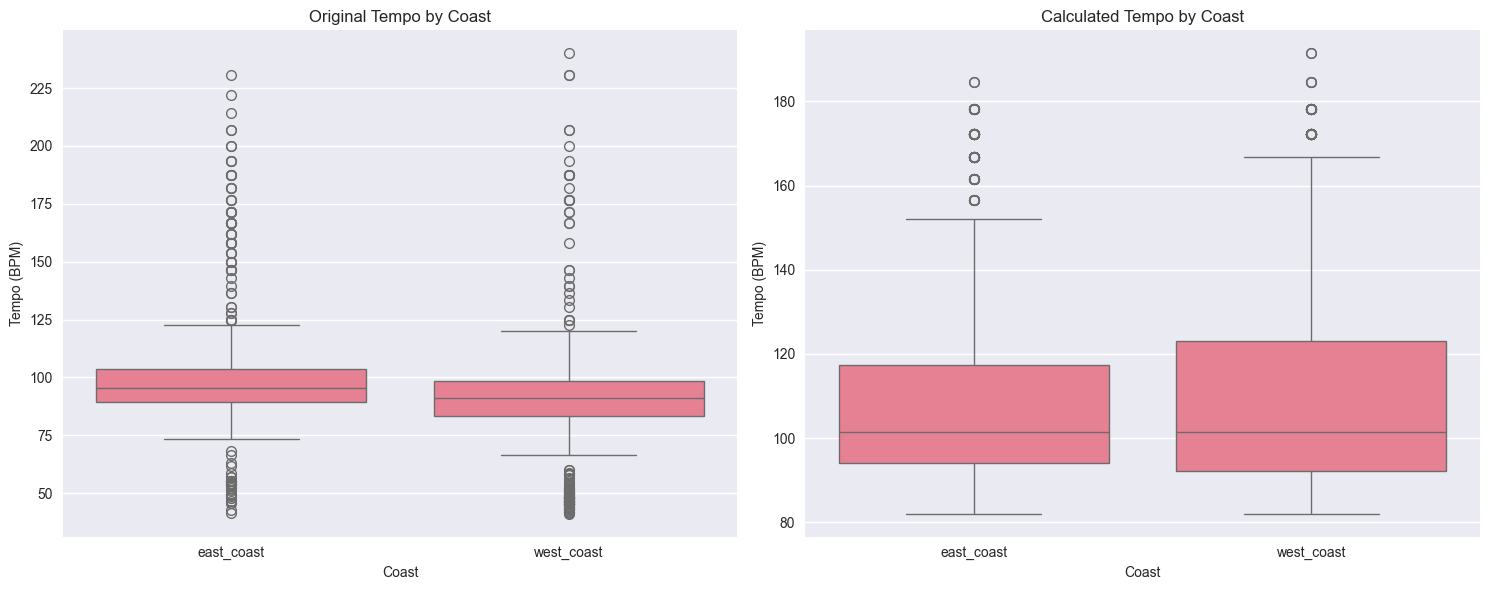


Original Tempo (Tempo1) Statistics by Coast:
            count        mean        std       min        25%        50%  \
Coast                                                                      
east_coast  702.0  100.158158  24.862970  41.37931  89.552239  95.238095   
west_coast  666.0   90.167702  27.010115  41.09589  83.333333  90.909091   

                   75%         max  
Coast                               
east_coast  103.448276  230.769231  
west_coast   98.360656  240.000000  

Calculated Tempo Statistics by Coast:
            count        mean        std       min        25%         50%  \
Coast                                                                       
east_coast  699.0  110.486802  24.122587  82.03125  93.963068  101.332721   
west_coast  666.0  112.728651  27.236562  82.03125  92.285156  101.332721   

                   75%         max  
Coast                               
east_coast  117.453835  184.570312  
west_coast  123.046875  191.406250  


In [9]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Original Tempo1 by Coast
sns.boxplot(data=df, x='Coast', y='Tempo1', ax=ax1)
ax1.set_title('Original Tempo by Coast')
ax1.set_xlabel('Coast')
ax1.set_ylabel('Tempo (BPM)')

# Plot 2: Calculated Tempo by Coast
sns.boxplot(data=df, x='Coast', y='calculated_tempo', ax=ax2)
ax2.set_title('Calculated Tempo by Coast')
ax2.set_xlabel('Coast')
ax2.set_ylabel('Tempo (BPM)')

plt.tight_layout()
plt.show()

# Print statistics by coast
print("\nOriginal Tempo (Tempo1) Statistics by Coast:")
print(df.groupby('Coast')['Tempo1'].describe())
print("\nCalculated Tempo Statistics by Coast:")
print(df.groupby('Coast')['calculated_tempo'].describe())

## Compare Tempos by Release Year

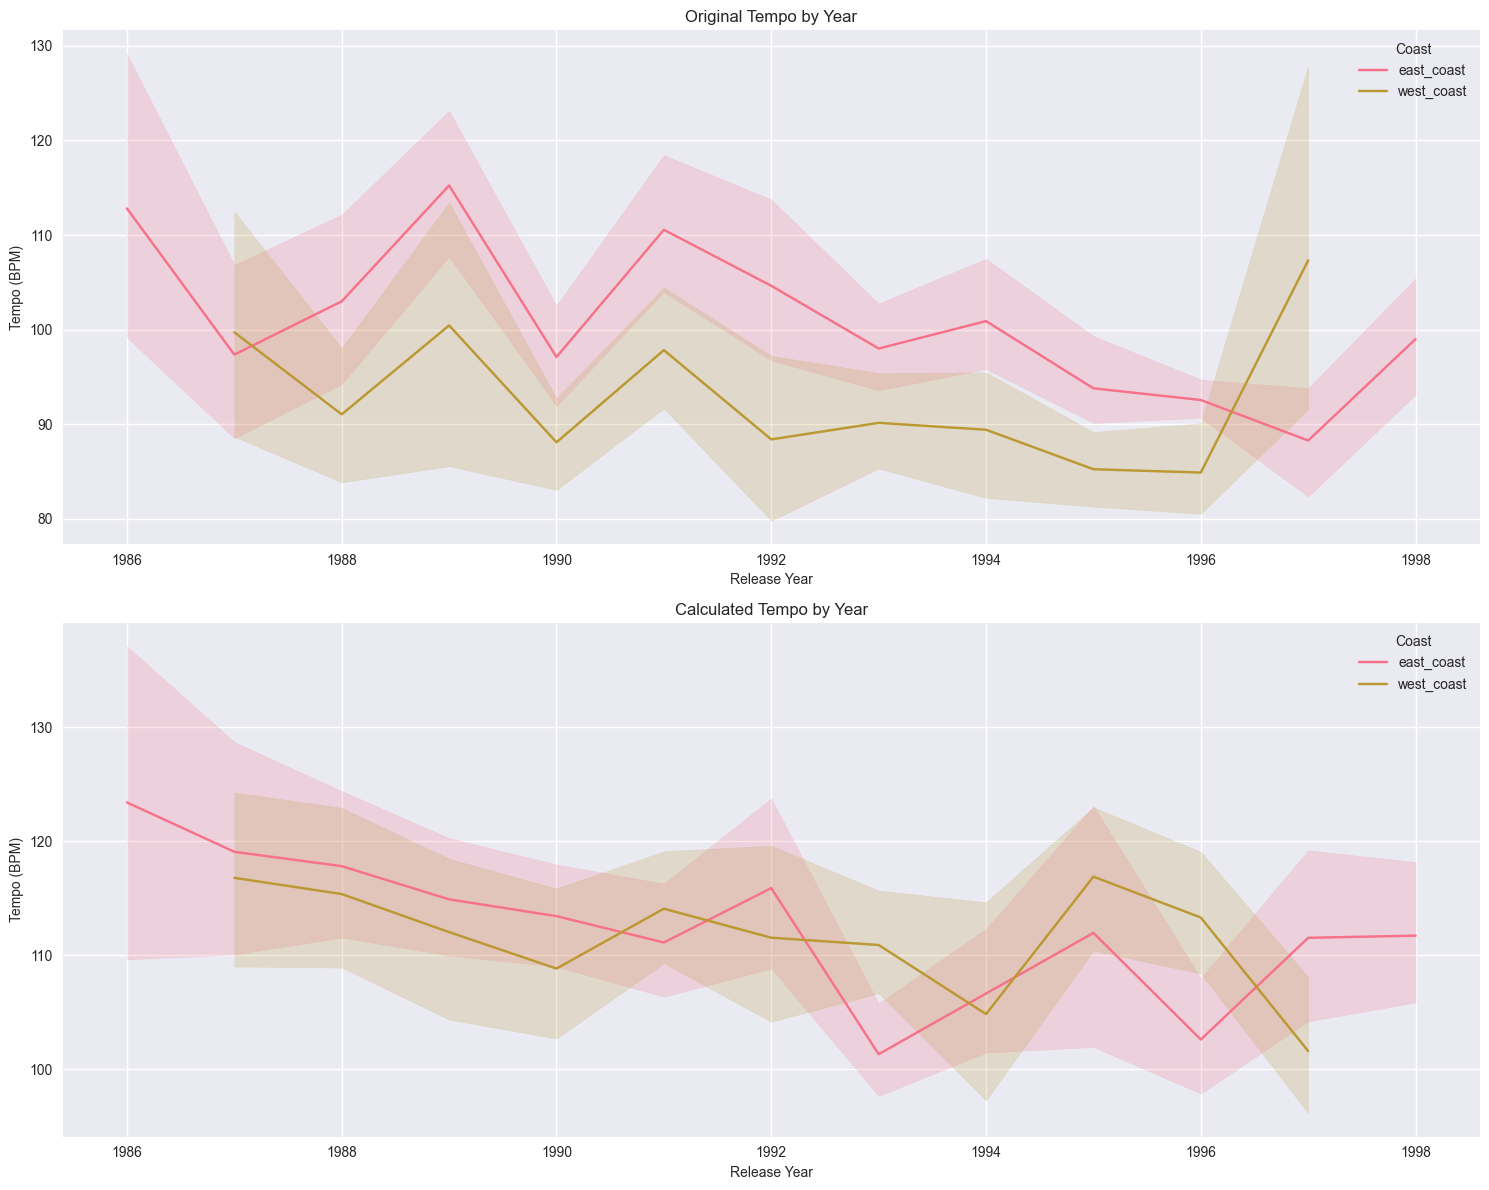


Correlation between original and calculated tempos: 0.027


In [10]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot 1: Original Tempo1 by Year
sns.lineplot(data=df, x='Release Year', y='Tempo1', hue='Coast', ax=ax1, errorbar='ci')
ax1.set_title('Original Tempo by Year')
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Tempo (BPM)')
ax1.grid(True)

# Plot 2: Calculated Tempo by Year
sns.lineplot(data=df, x='Release Year', y='calculated_tempo', hue='Coast', ax=ax2, errorbar='ci')
ax2.set_title('Calculated Tempo by Year')
ax2.set_xlabel('Release Year')
ax2.set_ylabel('Tempo (BPM)')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print correlation between original and calculated tempos
correlation = df['Tempo1'].corr(df['calculated_tempo'])
print(f"\nCorrelation between original and calculated tempos: {correlation:.3f}")